# ROC曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [2]:
# Import some data to play with
# 加载iris数据
iris = datasets.load_iris()
# 得到数据集(列名：萼片长度，萼片宽度，花瓣长度，花瓣宽度)
X = iris.data
# 得到数据的标签（3种不同类型的虹膜）
y = iris.target

In [3]:
# Binarize the output
# 对标签进行二值化
y = label_binarize(y, classes=[0, 1, 2])
# 得到标签的数量（得到分类数量）
n_classes = y.shape[1]

In [4]:
# Add noisy features to make the problem harder
# 得到随机数生成器
random_state = np.random.RandomState(0)
# n_samples为总样本数，n_features为样本特征数
n_samples, n_features = X.shape
# np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()
# 将原样本进行特征值扩展为203个
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [5]:
# shuffle and split training and test sets
# train_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签
# 将数据划分了50%的训练子集和50%的测试子集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [6]:
# Learn to predict each class against the other
# svm.SVC():支持向量分类
# kernel: 指定要在算法中使用的内核类型
# probability: 是否启用概率估计。必须在调用fit之前启用它，并且会减慢该方法的速度
# random_state: 伪随机数生成器的种子在对数据进行混洗以用于概率估计时使用
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
# 训练数据，并将分类器用在X_test测试集上，得到测试集的得分
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [7]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Compute Receiver operating characteristic
    # fpr: 增加假阳性率，使得元素i是具有得分> =阈值[i]的假阳性预测率
    # tpr: 增加真阳性率，使得元素i是具有得分> =阈值[i]的真实阳性预测率
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    # 得到auc的值
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# ravel(): 将多维数组转换为一维数组的功能
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

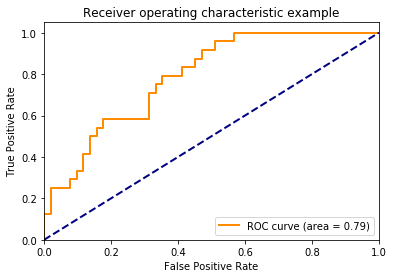

In [8]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
# 画一条虚线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# x轴的定义域
plt.xlim([0.0, 1.0])
# y轴的值域
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
# 设置图示的位置
plt.legend(loc="lower right")
plt.show()